<a href="https://colab.research.google.com/github/PolinaSushko/Machine-Learning/blob/main/Sushko_9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report

from scipy.stats import reciprocal

import cv2

import warnings
from sklearn.exceptions import ConvergenceWarning

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

# Завдання 1

In [3]:
# 1. Завантаження датасету

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
# Роздідлення даних на тренувальний та валідаційний набори

X_train, X_valid = X_train_full[5000:] / 255.0, X_train_full[:5000] / 255.0
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

In [7]:
X_train.shape, X_valid.shape

((55000, 28, 28), (5000, 28, 28))

In [8]:
# Визначення класів

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
class_names[y_train[0]]

'Coat'

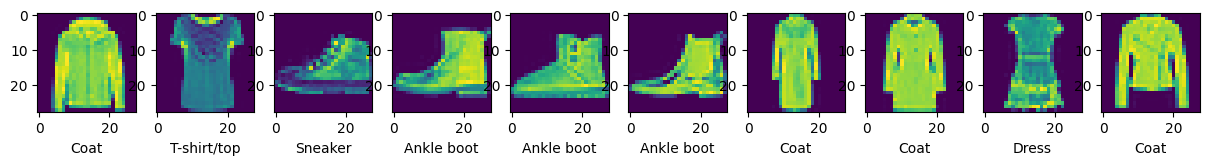

In [9]:
# 2. Відображення 10 зображень

def plot_examples(data, value, n_rows, n_cols):
    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))

    for row in range(n_rows):
        for col in range(n_cols):

            index = n_cols * row + col

            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(data[index])
            plt.xlabel(class_names[value[index]])

    plt.show()

plot_examples(X_train, y_train, 1, 10)

## Only MaxPooling2D

In [29]:
# 3. Побудова моделі

model_conv = keras.models.Sequential([
    keras.layers.Input(shape = (28, 28, 1)),  # Explicit Input layer
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

In [30]:
model_conv.compile(optimizer = tf.optimizers.Adam(),
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [31]:
# 4. Архітектура моделі

model_conv.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# 5. Використання ранньої зупинки та зменшення швидкості навчання

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr      = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3)

In [33]:
# Навчання моделі

history_conv = model_conv.fit(X_train, y_train, epochs = 50,
                              validation_data = (X_valid, y_valid),
                              callbacks = [early_stopping, reduce_lr])
history_conv

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7393 - loss: 0.7089 - val_accuracy: 0.8822 - val_loss: 0.3255 - learning_rate: 0.0010
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8752 - loss: 0.3382 - val_accuracy: 0.8952 - val_loss: 0.2773 - learning_rate: 0.0010
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8968 - loss: 0.2846 - val_accuracy: 0.9058 - val_loss: 0.2529 - learning_rate: 0.0010
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9054 - loss: 0.2602 - val_accuracy: 0.9094 - val_loss: 0.2379 - learning_rate: 0.0010
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9125 - loss: 0.2386 - val_accuracy: 0.9148 - val_loss: 0.2224 - learning_rate: 0.0010
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9209 - loss: 0.2161 - val_accuracy: 0.9198 - val_loss: 0.2132 - learning_rate: 0.0010
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9271 -

In [19]:
# 6. Побудова графіків функції втрат і точності

def show_train_summary(model_name, history, epochs):
  history_dict = history.history

  fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Train/Val accuracy", "Train/Val loss"))

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["accuracy"],
                           mode = "lines+markers",
                           name = "Train Accuracy"),
                           row = 1, col = 1)

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["val_accuracy"],
                           mode = "lines+markers",
                           name = "Validation Accuracy"),
                           row = 1, col = 1)

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["loss"],
                           mode = "lines+markers",
                           name = "Train Loss"),
                           row = 1, col = 2)

  fig.add_trace(go.Scatter(x = epochs, y = history_dict["val_loss"],
                           mode = "lines+markers",
                           name = "Validation Loss"),
                           row = 1, col = 2)

  fig.update_layout(height = 500, width = 1100,
                    title_text = f"Model {model_name} training summary",
                    title_x = 0.5,
                    title_xanchor = 'center',
                    legend = dict(
                        orientation = 'h',
                        yanchor = 'bottom',
                        y = -0.2,
                        xanchor = 'center',
                        x = 0.5
        ))
  fig.update_xaxes(title_text = "Epochs")
  fig.update_yaxes(title_text = "Accuracy", row = 1, col = 1)
  fig.update_yaxes(title_text = "Loss", row = 1, col = 2)

  fig.show()

In [36]:
show_train_summary("Convolution", history_conv, list(range(1, 16 + 1)))

In [39]:
# 7. Класифікаційний звіт

test_loss, test_acc = model_conv.evaluate(X_test, y_test, verbose = 2)
predictions         = model_conv.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels, target_names = class_names))

313/313 - 0s - 2ms/step - accuracy: 0.8302 - loss: 46.2275
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.90      0.56      0.69      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.86      0.61      0.71      1000
       Dress       0.93      0.75      0.83      1000
        Coat       0.60      0.95      0.73      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.52      0.65      0.58      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.90      0.97      0.94      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.83     10000
   macro avg       0.86      0.83      0.83     10000
weighted avg       0.86      0.83      0.83     10000



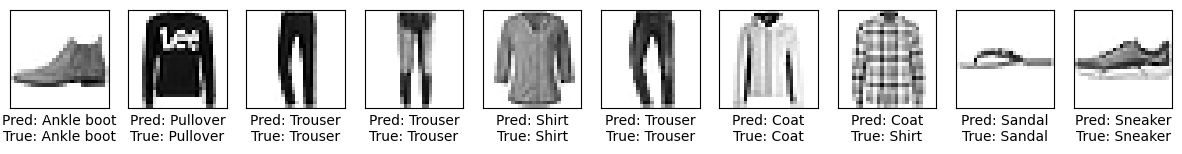

In [40]:
# 8. Результати розпізнавання із прогнозованим і справжнім класом

plt.figure(figsize = (15, 10))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap = plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[y_test[i]]}")
plt.show()

## GlobalAveragePooling2D

In [41]:
model_pool = keras.models.Sequential([
    keras.layers.Input(shape = (28, 28, 1)),  # Explicit Input layer
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation = 'softmax')
])

In [42]:
model_pool.compile(optimizer = tf.optimizers.Adam(),
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [43]:
model_pool.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,962 (367.04 KB)

 Trainable params: 93,962 (367.04 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
reduce_lr      = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3)

In [45]:
history_pool = model_pool.fit(X_train, y_train, epochs = 50,
                              validation_data = (X_valid, y_valid),
                              callbacks = [early_stopping, reduce_lr])
history_pool

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5672 - loss: 1.1504 - val_accuracy: 0.8116 - val_loss: 0.5333 - learning_rate: 0.0010
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7880 - loss: 0.5838 - val_accuracy: 0.8476 - val_loss: 0.4190 - learning_rate: 0.0010
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8270 - loss: 0.4772 - val_accuracy: 0.8716 - val_loss: 0.3623 - learning_rate: 0.0010
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8466 - loss: 0.4264 - val_accuracy: 0.8836 - val_loss: 0.3191 - learning_rate: 0.0010
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8598 - loss: 0.3912 - val_accuracy: 0.8884 - val_loss: 0.3075 - learning_rate: 0.0010
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8695 - loss: 0.3617 - val_accuracy: 0.8798 - val_loss: 0.3164 - learning_rate: 0.0010
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8773 - 

In [46]:
show_train_summary("GlobalAveragePooling2D", history_pool, list(range(1, 36 + 1)))

In [55]:
test_loss, test_acc = model_pool.evaluate(X_test, y_test, verbose = 2)
predictions         = model_pool.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)

313/313 - 1s - 2ms/step - accuracy: 0.7701 - loss: 43.5418
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


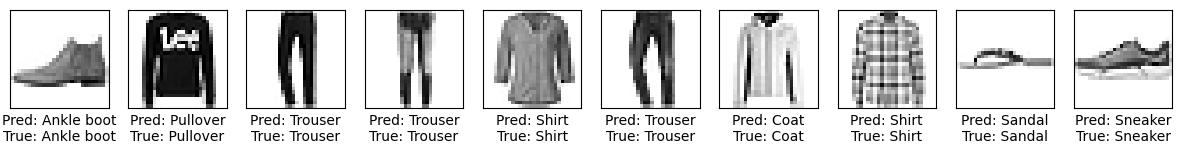

In [56]:
plt.figure(figsize = (15, 10))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap = plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[y_test[i]]}")
plt.show()

# Завдання 2

In [16]:
# Визначити вхідну форму для VGG16
input_shape = (32, 32, 3)

# Модель VGG16 з попередньо підготовленими вагами, за винятком верхніх шарів.
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = input_shape)

# Замороження базових шарів моделі
for layer in base_model.layers:
    layer.trainable = False

# Додавання шарів зреху
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(10, activation = 'softmax')(x)

# Модель
model = keras.models.Model(inputs = base_model.input, outputs = output)

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor ='val_loss', patience = 5, restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3)

# Попередня обробка даних:
X_train_resized = np.array([cv2.resize(img, (32, 32)) for img in X_train])
X_train_resized = np.repeat(np.expand_dims(X_train_resized, axis = -1), 3, axis = -1)

X_valid_resized = np.array([cv2.resize(img, (32, 32)) for img in X_valid])
X_valid_resized = np.repeat(np.expand_dims(X_valid_resized, axis = -1), 3, axis = -1)

y_train_one_hot = to_categorical(y_train, num_classes = 10)
y_valid_one_hot = to_categorical(y_valid, num_classes = 10)


# Навчання моделі
history = model.fit(X_train_resized, y_train_one_hot, epochs = 50,
                    validation_data = (X_valid_resized, y_valid_one_hot),
                    callbacks = [early_stopping, reduce_lr])
history

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.7114 - loss: 0.8248 - val_accuracy: 0.8436 - val_loss: 0.4402 - learning_rate: 0.0010
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.8235 - loss: 0.4820 - val_accuracy: 0.8570 - val_loss: 0.3864 - learning_rate: 0.0010
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8398 - loss: 0.4365 - val_accuracy: 0.8670 - val_loss: 0.3695 - learning_rate: 0.0010
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8432 - loss: 0.4237 - val_accuracy: 0.8642 - val_loss: 0.3638 - learning_rate: 0.0010
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8507 - loss: 0.4051 - val_accuracy: 0.8694 - val_loss: 0.3520 - learning_rate: 0.0010
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8551 - loss: 0.3920 - val_accuracy: 0.8670 - val_loss: 0.3618 - learning_rate: 0.0010
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.

In [17]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,116,384 (57.66 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 267,798 (1.02 MB)

In [20]:
show_train_summary("Frozen", history, list(range(1, 31 + 1)))

In [25]:
X_test_resized = np.array([cv2.resize(img, (32, 32)) for img in X_test])
X_test_resized = np.repeat(np.expand_dims(X_test_resized, axis = -1), 3, axis = -1)

y_test_one_hot = to_categorical(y_test, num_classes=10)

test_loss, test_acc = model.evaluate(X_test_resized, y_test_one_hot, verbose = 2)
predictions         = model.predict(X_test_resized)

predicted_labels = np.argmax(predictions, axis=1)

313/313 - 2s - 8ms/step - accuracy: 0.4387 - loss: 262.5233
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


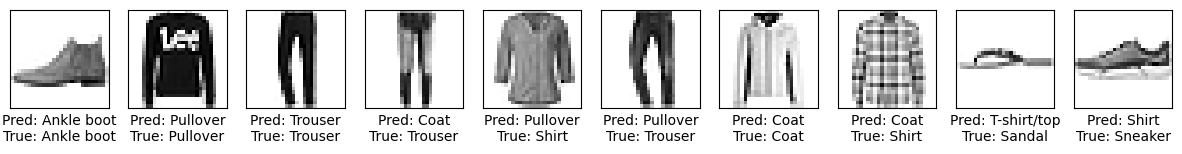

In [26]:
plt.figure(figsize = (15, 10))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap = plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[y_test[i]]}")
plt.show()

Дана модель має набагато нижчу точність аніж дві попередні моделі.